In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# we need to install mlxtend on anaconda prompt by typing 'pip install mlxtend'
from mlxtend.frequent_patterns import apriori  
from mlxtend.frequent_patterns import association_rules

In [2]:
df = pd.read_csv("BreadBasket_DMS.csv")
df.head(5)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [3]:
#loading every single item inside the Item dictionary
Items = {}

for item in df['Item']:
    if item in Items:
        Items[item] = Items[item]+1
    else:
        Items[item] = 1



In [4]:
print(Items)

{'The BART': 1, 'Bread Pudding': 4, 'Baguette': 152, 'Farm House': 374, 'My-5 Fruit Shoot': 18, 'Tiffin': 146, 'Mighty Protein': 11, 'Chicken sand': 1, 'Mineral water': 136, 'Olum & polenta': 1, 'Juice': 369, 'Lemon and coconut': 6, 'Chicken Stew': 123, 'Panatone': 5, 'Tshirt': 21, 'Raspberry shortbread sandwich': 3, 'Cookies': 540, 'Soup': 342, 'Muesli': 8, 'Kids biscuit': 12, 'Pastry': 856, 'Caramel bites': 3, 'Adjustment': 1, 'Nomad bag': 8, 'NONE': 786, 'Coffee granules ': 7, 'Cherry me Dried fruit': 3, 'Vegan mincepie': 54, 'Chimichurri Oil': 2, 'Coke': 185, 'Scandinavian': 277, 'Spread': 2, 'Granola': 28, 'Gift voucher': 1, 'Vegan Feast': 16, 'Half slice Monster ': 6, 'Muffin': 370, 'Bread': 3325, 'Polenta': 1, 'Crepes': 6, 'Basket': 6, 'Raw bars': 1, 'Frittata': 81, 'Gingerbread syrup': 9, 'Spanish Brunch': 172, 'Eggs': 28, 'Hot chocolate': 590, 'Argentina Night': 7, 'Keeping It Local': 63, 'Extra Salami or Feta': 38, 'Pick and Mix Bowls': 12, 'Scone': 327, 'Focaccia': 54, 'Brow

In [5]:
Items = dict((i,Items[i]) for i in Items if i!='NONE') #Removing the NONE value from the dictionary 

In [6]:
print(Items)

{'The BART': 1, 'Bread Pudding': 4, 'Baguette': 152, 'Farm House': 374, 'My-5 Fruit Shoot': 18, 'Tiffin': 146, 'Mighty Protein': 11, 'Hot chocolate': 590, 'Mineral water': 136, 'Olum & polenta': 1, 'Juice': 369, 'Lemon and coconut': 6, 'Chicken Stew': 123, 'Panatone': 5, 'Tshirt': 21, 'Raspberry shortbread sandwich': 3, 'Cookies': 540, 'Duck egg': 12, 'Soup': 342, 'Muesli': 8, 'Kids biscuit': 12, 'Caramel bites': 3, 'Adjustment': 1, 'Nomad bag': 8, 'Coffee granules ': 7, 'Cherry me Dried fruit': 3, 'Vegan mincepie': 54, 'Chimichurri Oil': 2, 'Coke': 185, 'Tartine': 47, 'Granola': 28, 'Gift voucher': 1, 'Vegan Feast': 16, 'Half slice Monster ': 6, 'Muffin': 370, 'Bread': 3325, 'Polenta': 1, 'Crepes': 6, 'Basket': 6, 'Frittata': 81, 'Gingerbread syrup': 9, 'Pastry': 856, 'Eggs': 28, 'Chicken sand': 1, 'Argentina Night': 7, 'Keeping It Local': 63, 'Extra Salami or Feta': 38, 'Pick and Mix Bowls': 12, 'Scone': 327, 'Brownie': 379, 'Tacos/Fajita': 11, 'Honey': 6, 'Chocolates': 10, 'Fairy Do

In [7]:
#Ading the names and the amount of times that item was bought. Keys for the name and vals for the amounts
keys=[]
vals = []

for i,k in Items.items():
    if k>100:
        keys.append(i)
        vals.append(k)

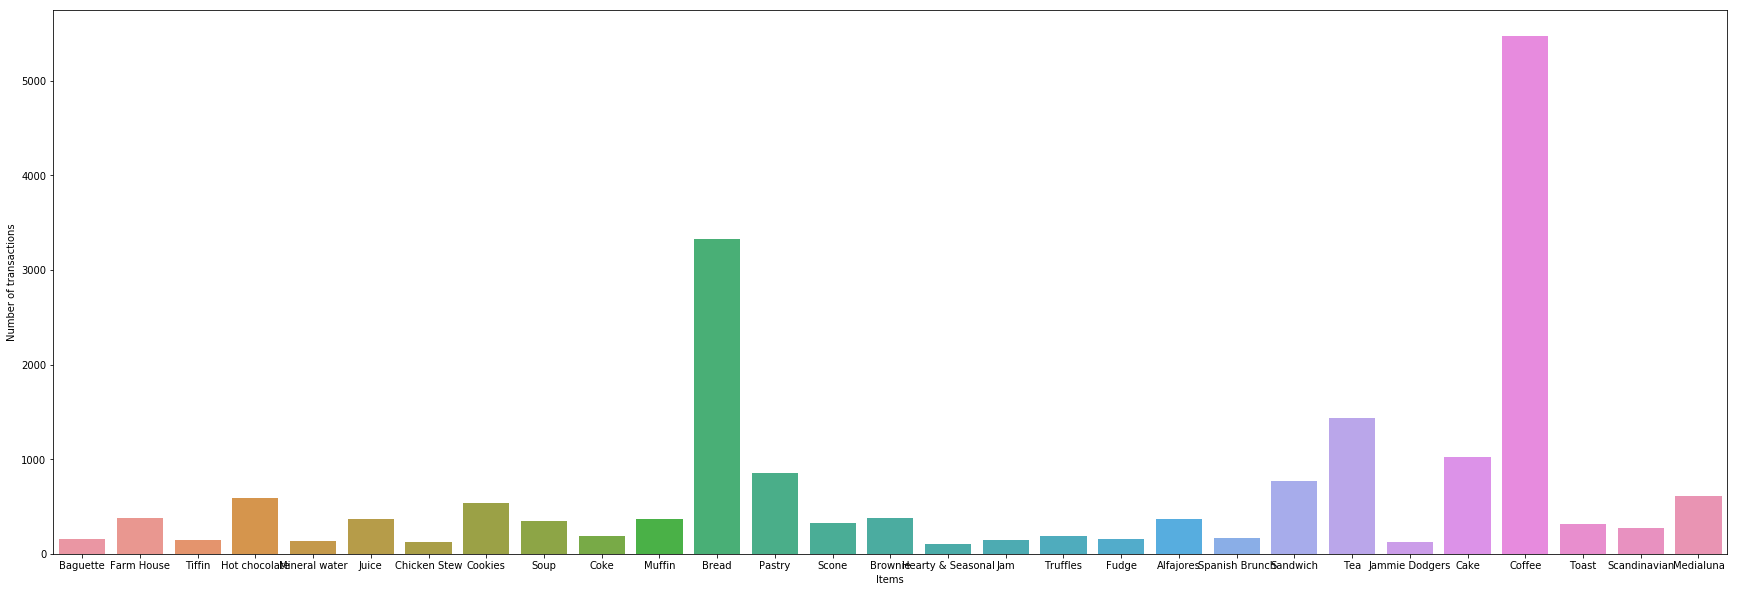

In [8]:
plt.figure(figsize=(30,10))
sns.barplot(x=keys, y=vals)
plt.xlabel("Items")
plt.ylabel("Number of transactions")
plt.show()

In [9]:
df = df[df.Item.str.contains("NONE") == False] #Removing all the rows with NONE in them

In [10]:
'''df['Quantity']= 1
basket = df.groupby(['Transaction', 'Item'])['Quantity'].sum()er.fillna(0)
basket.head()'''

#Checking differences betwenn adding the unstack

df['Quantity']= 1
basket = df.groupby(['Transaction', 'Item'])['Quantity'].sum().unstack().fillna(0)
basket.head()


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
print(frequent_itemsets)

    support         itemsets
0  0.327205          (Bread)
1  0.103856           (Cake)
2  0.478394         (Coffee)
3  0.086107         (Pastry)
4  0.071844       (Sandwich)
5  0.142631            (Tea)
6  0.090016  (Coffee, Bread)


In [13]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold =0)
rules.head()

'''So at the end the only association rule inside this dataset was tat there is a relation between the bread and the coffee'''

'So at the end the only association rule inside this dataset was tat there is a relation between the bread and the coffee'